### This is demo example for diffusion_maps_tool
We will create the swiss_roll data and will pass it to
diffusion maps for two-dimensional embedding.

All the array are stored scipy CSR sparse matrix format.

The distance options are
- **pdist**: the built-in scipy all pairwise distances.
- **cKDTree**: the nearest neighbour tree construction and optional maximum distance (cut_off). Defult cut_off = infinity
- **Hnswlib**: fast approximate nearest neighbor search with optional k nearest neighbour (n_neighbors). Default n_neighbors = 5% of total points.

For using Hnswlib one need install it as follow:

```pip install pybind11
git clone https://github.com/nmslib/hnswlib.git
cd hnswlib/python_bindings/
python setup.py install```

In [1]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.random.seed(12345) #fix the random seed for reproducability

In [2]:
# import the diffusion_map_tools (if it is in the same path)
import sys
sys.path.append('../src/')
from diffusion_maps_tools import *

In [3]:
# function to produce the swiss roll
def swiss_roll(n_points, n_features, 
               noise, n_turn, radi):
    rng = np.random.RandomState(noise)
    t = rng.uniform(low=0, high=1, size=n_points)
    data = np.zeros((n_points, n_features))
    # generate the 2D spiral data by a 1d parameter t
    max_rot = n_turn * 2 * np.pi
    data[:, 0] = radi = t * np.cos(t * max_rot)
    data[:, 1] = radi = t * np.sin(t * max_rot)
    data[:, 2] = rng.uniform(-1, 1.0, n_points)
    color = [str(item/len(t)) 
            for item in t]
    return data, color

In [4]:
# function for normalizing data (optional)
def normalize(d):
    d -= np.min(d, axis=0)
    d /= np.ptp(d, axis=0)
    return d

In [5]:
# Parameters of Swiss-roll
n_points   = 3000
n_features = 3
noise      = 0
radi       = 1.0
n_turn     = 1.0

In [6]:
# Generate Data and color (radial color)
print('> Generate Data')
data, color = swiss_roll(n_points, n_features,
                         noise, n_turn, radi)

> Generate Data


In [7]:
# Normalize data
data = normalize(data)

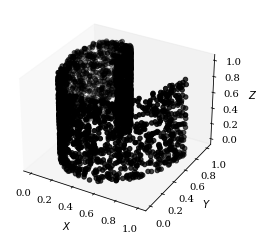

In [8]:
# Normalize data
data = normalize(data)
# plot data
plt.figure()
ax1 = plt.subplot(projection='3d')
sw_roll = ax1.scatter(data[:,0], data[:,1], data[:,2],
                      c=color, cmap=plt.cm.jet)
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_zlabel(r'$Z$')
ax1.grid(False)

In [9]:
# initialize the library
DiffMaps = diffusion_maps_tools()

  > Dataset: 3000 points in 3 dimensions
  > Compute distances with pdist
  --> Distance matrix is 100.0000% dense.
  > Compute Kernel
  > Compute Normalized Kernel with alpha=1.000000
  > Compute First 5 Eigenvectors
    Eigenvalues are = [1.         0.99693492 0.98780915 0.97882795 0.97570149]


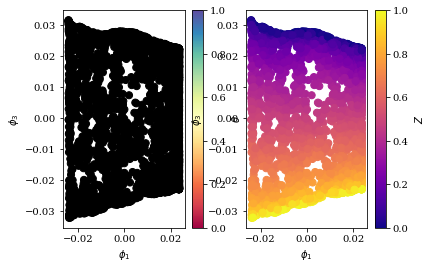

In [10]:
# pairwise distance with pdist (default)
num_eigenpairs = 5
epsilon = 1e-1
distance = DiffMaps.distance(points = data)
kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon**2)
kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
print('    Eigenvalues are = {}'.format(eigval.real))

# plot first two-nontrivial eigenvectors and color by Z and radial
plt.figure()
ax = plt.subplot(121)
p=ax.scatter(phi[:,1],
             phi[:,3], 
             c= color,
             s= 50,
             cmap= plt.get_cmap('jet'))
ax.set_xlabel(r'$\phi_1$')
ax.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p)
cbar.set_label(r'$\theta$')

ax2 = plt.subplot(122)
p2=ax2.scatter(phi[:,1],
               phi[:,3], 
               c= data[:,2],
               s= 50,
               cmap= plt.get_cmap('plasma'))
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p2)
cbar.set_label(r'$Z$')

  > Dataset: 3000 points in 3 dimensions
  > Compute distances with kdtree
  --> distances greater than 9.000000E-01 are neglected
  --> Distance matrix is 71.7817% dense.
  > Compute Kernel
  > Compute Normalized Kernel with alpha=1.000000
  > Compute First 5 Eigenvectors
    Eigenvalues are = [1.         0.99693492 0.98780915 0.97882777 0.97570827]


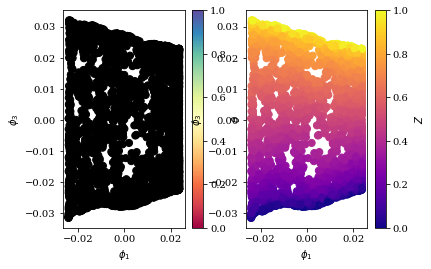

In [11]:
num_eigenpairs = 5
epsilon = 1e-1
# pairwise distance with cKDTree with cut_off=0.9
distance = DiffMaps.distance(points = data,
                             method = 'kdtree',
                             kdtree_options={'cut_off':0.9})
kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon**2)
kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
print('    Eigenvalues are = {}'.format(eigval.real))

# plot first two-nontrivial eigenvectors and color by Z and radial
plt.figure()
ax = plt.subplot(121)
p=ax.scatter(phi[:,1],
             phi[:,3], 
             c= color,
             s= 50,
             cmap= plt.get_cmap('jet'))
ax.set_xlabel(r'$\phi_1$')
ax.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p)
cbar.set_label(r'$\theta$')

ax2 = plt.subplot(122)
p2=ax2.scatter(phi[:,1],
               phi[:,3], 
               c= data[:,2],
               s= 50,
               cmap= plt.get_cmap('plasma'))
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p2)
cbar.set_label(r'$Z$')

  > Dataset: 3000 points in 3 dimensions
  > Compute distances with hnswtree
  --> 1000 nearest neigh. are considered
  --> Distance matrix is 33.3333% dense.
  > Compute Kernel
  > Compute Normalized Kernel with alpha=1.000000
  > Compute First 5 Eigenvectors
    Eigenvalues are = [1.         0.99693493 0.98780916 0.97882777 0.97570437]


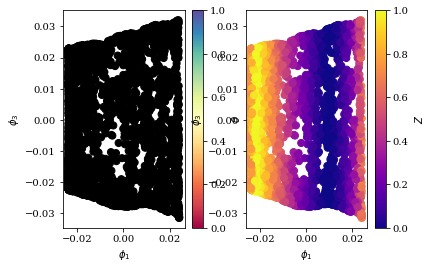

In [12]:
num_eigenpairs = 5
epsilon = 1e-1
# pairwise distance with hnswlib tree with 500 nearest neighbors
distance = DiffMaps.distance(points = data,
                              method = 'hnswtree',
                              hnswtree_options={'n_neighbors':1000})
kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon**2)
del distance
kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
del kernel
print('    Eigenvalues are = {}'.format(eigval.real))

# plot first two-nontrivial eigenvectors and color by Z and radial
plt.figure()
ax = plt.subplot(121)
p=ax.scatter(phi[:,1],
             phi[:,3], 
             c= color,
             s= 50,
             cmap= plt.get_cmap('jet'))
ax.set_xlabel(r'$\phi_1$')
ax.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p)
cbar.set_label(r'$\theta$')

ax2 = plt.subplot(122)
p2=ax2.scatter(phi[:,1],
               phi[:,3], 
               c= data[:,1],
               s= 50,
               cmap= plt.get_cmap('plasma'))
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_3$')
cbar = plt.colorbar(p2)
cbar.set_label(r'$Z$')

In [13]:
ax = plt.subplot(111, projection='3d')
ax.scatter(phi[:,1],phi[:,3], data[:,1], c=data[:,0])

In [14]:
data.shape

(3000, 3)